<a href="https://colab.research.google.com/github/priyadarsh99/The-Sparks-Foundation-/blob/main/GRIP_TASK_2_UNSUPERVISED_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#\#GRIPAPR2022

# **TASK 2: Prediction Using Unsupervised ML**

## Problem : From the given Iris dataset, predict the optimum number of clusters and represent it visually italicized text

### Importing Packages

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
#importing the necessary packages

### Loading the dataset

In [9]:
iris = datasets.load_iris()
#loading the iris dataset
ir_df = pd.DataFrame(iris.data, columns = iris.feature_names)


In [10]:
ir_df.head(10)
#displaying the first 10 rows of the dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [11]:
ir_df.columns
#displaying various features of the dataset

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [12]:
ir_df.shape
#displaying the size of the dataset

(150, 4)

### Checking for any missing values

In [13]:
ir_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [14]:
ir_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#### *from the above output we conclude that there is no missing value in the dataset*

### Process for finding optimum number of clusters for KMeans starts

In [15]:
X = ir_df.iloc[:, [0,1,2,3]].values
#finding the optimum no of clusters for kmeans classification

In [16]:
from sklearn.cluster import KMeans

In [18]:
wcss = []
for i in range(1,11):
  k_means = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
  k_means.fit(X)
  wcss.append(k_means.inertia_)

### Displaying the results on a graph and allowing us to observe the elbow

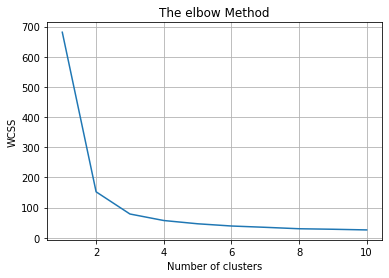

In [19]:
plt.plot(range(1,11), wcss)
plt.title('The elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()
#plotting the results on a line graph and observing the elbow

### Applying Kmeans to the dataset

In [20]:
k_means = KMeans(n_clusters = 3 , init = 'k-means++', max_iter =300, n_init=10,random_state = 1)
y_kmeans =  k_means.fit_predict(X)
#creating kmeans classifier

### Visualising the clusters

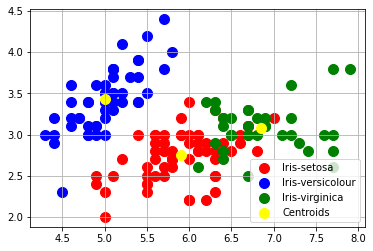

In [25]:
plt.scatter(X[y_kmeans ==0, 0],X[y_kmeans ==0,1], s=100, c='red',label='Iris-setosa')
plt.scatter(X[y_kmeans==1,0], X[y_kmeans==1,1], s=100, c='blue',label='Iris-versicolour')
plt.scatter(X[y_kmeans==2,0], X[y_kmeans==2,1],s=100, c='green', label = 'Iris-virginica')
#plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:,0], k_means.cluster_centers_[:,1],s=100,c='yellow',label = 'Centroids')
plt.legend()
plt.grid()
plt.show()